## 6.2 重みの初期値

重みの初期値としてどのような値を設定するかで、ニューラルネットワークの学習の成否が分かれることがよくある、

### 6.2.1 重みの初期値を0にすると？
- 重みの初期値は、これまで`0.01 * np.random.randn(10,100)`のように、標準偏差が0.01のガウス分布を用いていた。
- 重みの初期値を全て0にするのはよくない
- より正確には、重みを均一な値に設定してはいけない。全ての重みが、全く同じように更新されてしまう。重みの数を増やす意味がなくなってしまう

重みの対称的な構造を崩すために、ランダムな初期値が必要となる。


### 6.2.2 隠れ層のアクティベーション分布
最終的な出力ではなく、隠れ層のアクティベーション(活性化関数の後の出力データ)の分布を観察すると、多くの知見が得られる。

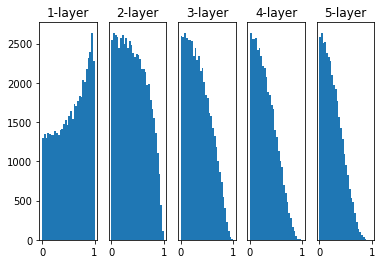

In [23]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
#     z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- シグモイド関数において、アクティベーションが0と1に偏った分布になってしまう。シグモイド関数においては出力が0,1付近で傾きが0に強く近づいてしまうため、学習が進まない。これは**勾配消失**と呼ばれる問題である。
- 重みの標準偏差を0.01の正規分布とした場合、アクティベーションは0.5に集中した。勾配消失は怒らないが、**表現力が劣る**(上述と同じ問題。重みの初期値がほぼ同じで対称性を持ってしまっているため。)

「Xavierの初期値」を用いる。前の層のノードの個数をnとした場合に、$\frac{1}{\sqrt n}$の標準偏差を持つ分布を使う。

勾配消失はシグモイド特有の問題。6-13 は、sigmoidの代わりにtanh関数を使うと改善される。

### 6.2.3 ReLUの場合の重みの初期値
- 「Heの初期値」を用いる。前の層のノードの個数をnとした場合に、$\frac{2}{\sqrt n}$の標準偏差を持つ分布を使う。
- 直感的には、ReLUは負の領域がゼロであるため、2倍の広がりを持たせる必要がある

### 6.2.4 MNISTデータセットによる重みの初期値の比較
<img src="activation-distribution.jpg" alt="drawing" width="500"/>
